In [323]:
# To embed plots in the notebooks
%matplotlib inline
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from __future__ import division
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.model_selection import KFold, StratifiedKFold,  train_test_split, KFold, GridSearchCV
import sklearn as sk
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score
import scipy . linalg as lng # linear algebra from scipy library
from scipy . spatial import distance # load distance function
from sklearn import preprocessing, svm # load preprocessing function
import warnings # to silence convergence warnings
from pathlib import Path
# seaborn can be used to "prettify" default matplotlib plots by importing and setting as default
import seaborn as sns
sns.set() # Set searborn as default
import os


In [324]:
path = Path().cwd()
data_file = path.parent / "Data" / "heart.csv"
T = pd.read_csv(data_file)
T.shape

(1025, 14)

# 1 Data Cleaning


In [325]:
T.duplicated().sum()
T.drop_duplicates(inplace=True)
len(T)
dataset = T.reset_index(drop=True)

dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [326]:
dataset['target'].value_counts()


1    164
0    138
Name: target, dtype: int64

In [327]:
#data.describe()

[]

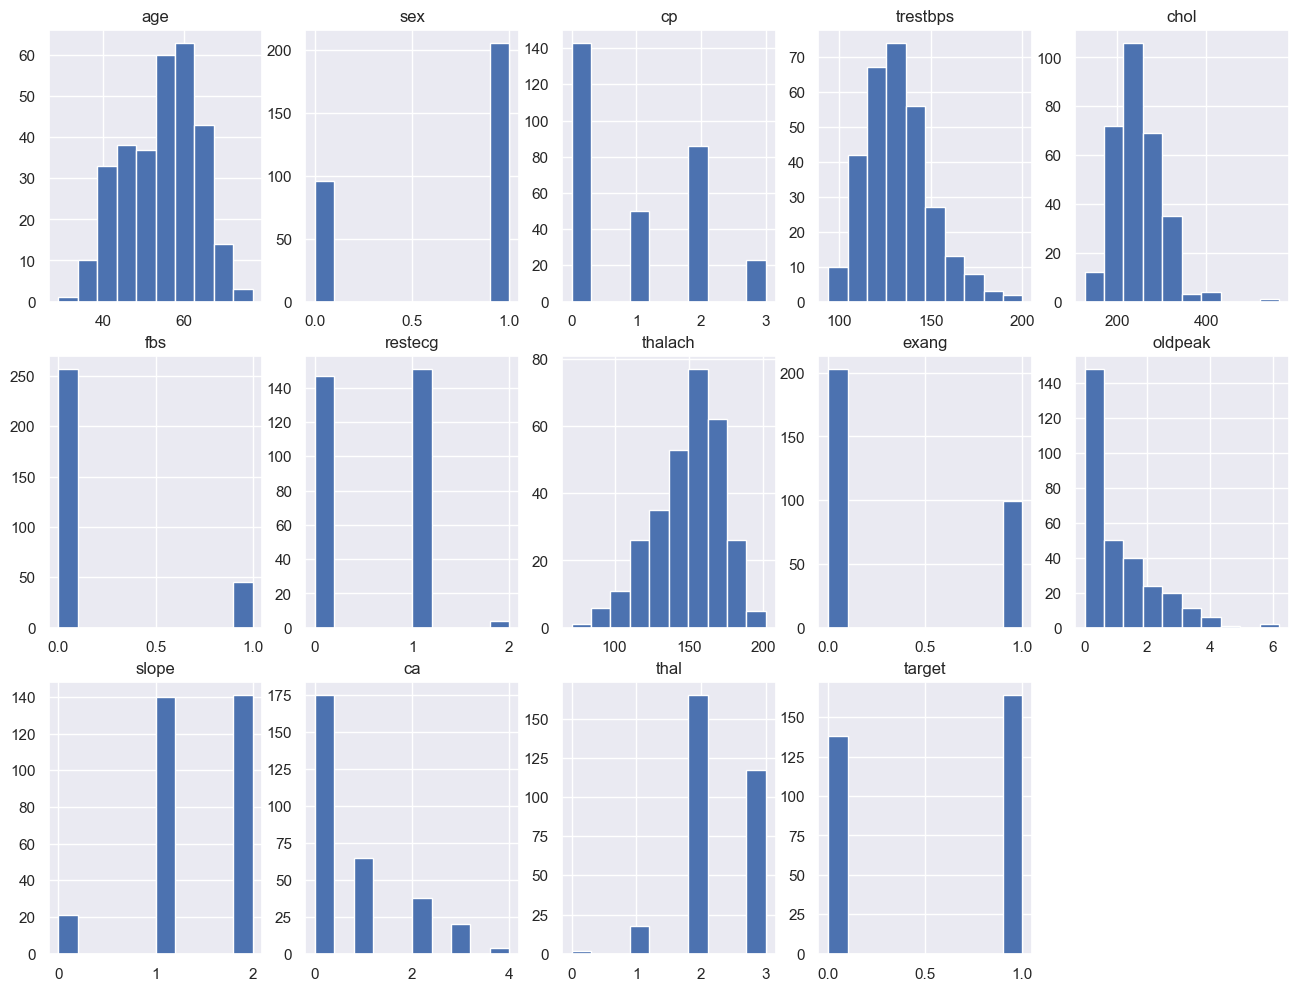

In [328]:
plt.figure(figsize=(16,12))

#Create 16 empty plots


plt.subplot(3,5,1)
plt.title("age")
plt.hist(dataset['age'])
plt.subplot(3,5,2)
plt.title("sex")
plt.hist(dataset['sex'])
plt.subplot(3,5,3)
plt.title("cp")
plt.hist(dataset['cp'])
plt.subplot(3,5,4)
plt.title("trestbps")
plt.hist(dataset['trestbps'])
plt.subplot(3,5,5)
plt.title("chol")
plt.hist(dataset['chol'])



plt.subplot(3,5,6)
plt.title("fbs")
plt.hist(dataset['fbs'])
plt.subplot(3,5,7)
plt.title("restecg")
plt.hist(dataset['restecg'])
plt.subplot(3,5,8)
plt.title("thalach")
plt.hist(dataset['thalach'])
plt.subplot(3,5,9)
plt.title("exang")
plt.hist(dataset['exang'])
plt.subplot(3,5,10)
plt.title("oldpeak")
plt.hist(dataset['oldpeak'])

plt.subplot(3,5,11)
plt.title("slope")
plt.hist(dataset['slope'])
plt.subplot(3,5,12)
plt.title("ca")
plt.hist(dataset['ca'])
plt.subplot(3,5,13)
plt.title("thal")
plt.hist(dataset['thal'])
plt.subplot(3,5,14)
plt.title("target")
plt.hist(dataset['target'])
plt.plot()

In [329]:
#plt.data.hist(figsize=(12,12))
#plt.pyplot.hist(data)
#data.kde(figsize(12,12))

In [330]:
   
    #for i in 
#plt.hist(dataset['age'],['target'])

In [331]:
#corrmat = data.corr()
#tor_cor_features = corrmat.index
#plt.figure(figsize=(12,10))
#mask = np.triu(np.ones_like(data.corr()))
#g = sns.heatmap(data[tor_cor_features].corr(),annot = True, mask=mask, cmap='RdYlGn')
#sns.pairplot(data, corner=True)


(14.5, -0.5)

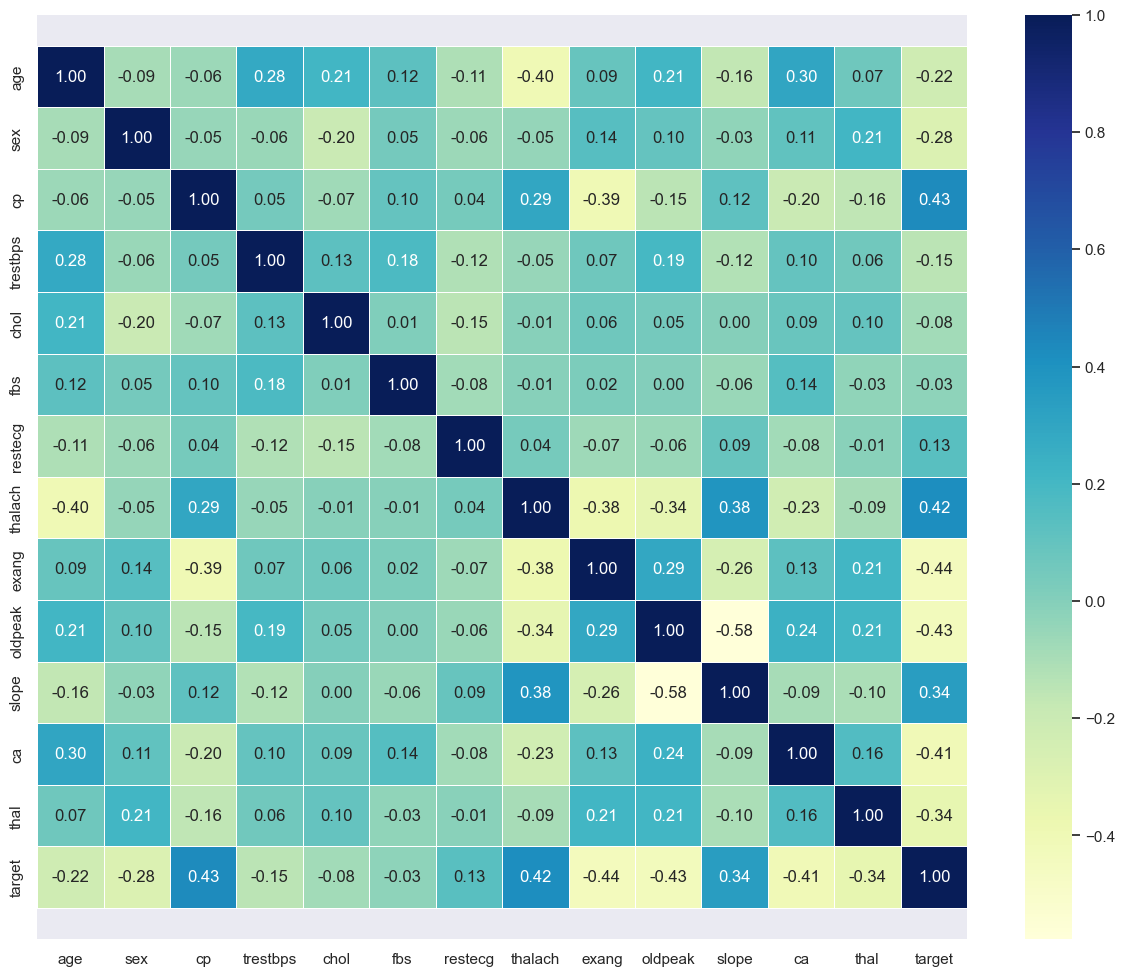

In [332]:
# Let's make our correlation matrix a little prettier
corr_matrix = dataset.corr()
fig, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [333]:
#columnss =['sex','cp','fbs','restecg','slope','thal','ca','exang']
#dataset = pd.get_dummies(dataset, columns = columnss)

In [334]:
y = dataset.target
X=dataset.drop(columns='target', axis=1)
N, P = X.shape


###### Train-Test split

In [335]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


### Logistic Regression:

In [336]:
#Converting split data into numpy array

Xtrain = np.array(X_train)
Ytrain = np.array(y_train)

Xtest = np.array(X_test)
Ytest = np.array(y_test)

CV lambda 1 std rule 15.26


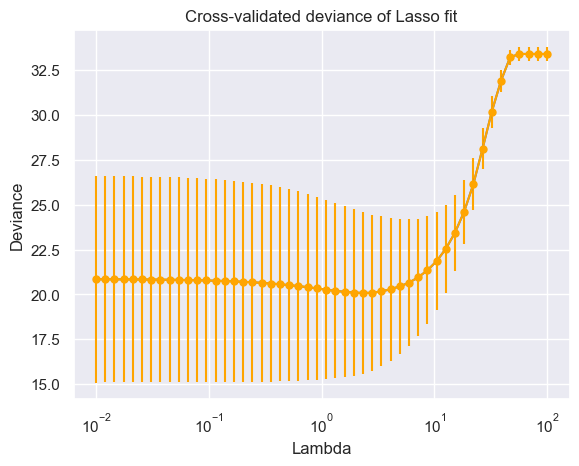

In [337]:
def devianceFunc(ytrue, yscores):
    return 2*sk.metrics.log_loss(ytrue, yscores, normalize=False)

lambdas = np.logspace(-2,2,50)
K = 10
CV = StratifiedKFold(K,shuffle=True)
X_standardizer = preprocessing.StandardScaler()

deviance = np.zeros((K, len(lambdas)))
with warnings.catch_warnings(): # done to disable all the convergence warnings from elastic net
    warnings.simplefilter("ignore")
    for i, (train_index, test_index) in enumerate(CV.split(Xtrain, Ytrain)):

        XX_train = Xtrain[train_index, :]
        yy_train = Ytrain[train_index]
        
        yy_test = Ytrain[test_index]
        XX_test = Xtrain[test_index]
        
        XX_train = X_standardizer.fit_transform(XX_train)
        XX_test = X_standardizer.transform(XX_test)

        for k, lambda_ in enumerate(lambdas):
            model = LogisticRegression(penalty = 'l1', C = 1/lambda_, solver='liblinear')
            model = model.fit(XX_train, yy_train)
            
            y_est = model.predict_proba(XX_test)
            
            deviance[i,k] = devianceFunc(yy_test, y_est)
            
testError = np.mean(deviance,axis=0)
testStd = np.std(deviance,axis=0)

# this is the index of the smallest error
minErrorIdx = np.argmin(testError)

# We want to find the simplest model that is only one standard error away from the smallest error
# We start by finding all indices that are less than one standard error away from the minimum error
J = np.where(testError < testError[minErrorIdx] + testStd[minErrorIdx])[0]

# then we take the simplest model (furthest to the right)
if (len(J) > 0):
    j = int(J[-1::])
else:
    j = minErrorIdx

Lambda_CV_1StdRule = lambdas[j]
print("CV lambda 1 std rule %0.2f" % Lambda_CV_1StdRule)


plt.figure()
plt.errorbar(lambdas, testError, testStd, marker='.', color='orange', markersize=10)
plt.semilogx(lambdas, testError)

plt.xlabel("Lambda")
plt.ylabel("Deviance")
plt.title("Cross-validated deviance of Lasso fit")
plt.show()

Shift + Enter run the current cell, select below
Ctrl + Enter run selected cells
Alt + Enter run the current cell, insert below
Ctrl + S save and checkpoint

In [338]:
XX_train = X_standardizer.fit_transform(Xtrain)
XX_test = X_standardizer.transform(Xtest)
modelOpt = LogisticRegression(penalty = 'l1', C = 1/Lambda_CV_1StdRule,solver='liblinear')
#modelOpt = LogisticRegression(penalty = 'elasticnet', C = 1/Lambda_CV_1StdRule,l1_ratio=0.4, solver='saga')
#modelOpt = LogisticRegression()

modelOpt = modelOpt.fit(XX_train, Ytrain)

coef = modelOpt.coef_

nrCoefs = len(np.nonzero(coef)[1])

print("The number of non-zero coefficients in our optimal model is: %d" % nrCoefs)

The number of non-zero coefficients in our optimal model is: 8


In [360]:
y_estOpt = modelOpt.predict(XX_test)

accuracy = np.sum(Ytest==modelOpt.predict(XX_test))/len(Ytest)

print("The accuracy for our optimal model is: %0.4f" % accuracy)

The accuracy for our optimal model is: 0.4426


C:\Users\shaji\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\shaji\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [340]:
cnf_matrix_lr = metrics.confusion_matrix(Ytest, y_estOpt)
lr_fpr, lr_tpr, _ = metrics.roc_curve(Ytest, y_estOpt)
aucl = metrics.roc_auc_score(y_test, y_estOpt)

In [341]:
aucl

0.9188453159041393

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        27
           1       0.94      0.91      0.93        34

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



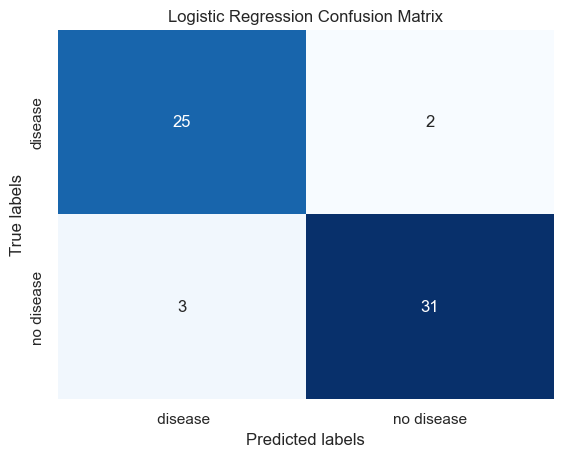

In [342]:
ax= plt.subplot()

print(classification_report(Ytest,y_estOpt))
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cnf_matrix_lr,annot=True,cmap="Blues",fmt="d",cbar=False)
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels([' disease', 'no disease']);
ax.yaxis.set_ticklabels(['disease', 'no disease']);

### Random Forest

In [89]:
#Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.20)


In [343]:
# Try to experiment with criterion, number of estimators, max_depth, min_samples_leaf
clf = RandomForestClassifier(bootstrap=True, oob_score=True, criterion = 'gini',random_state=0)

# number of trees
n_estimators = range(5,101)
max_depth = range(3,7)
max_features = range(3,13,2)

# Try to add more of the parameters from the model and then add them to this dict to see how it affects the model.
param_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'max_features': max_features
}

rf_grid = GridSearchCV(estimator = clf, param_grid = param_grid, cv = 5, verbose=2, n_jobs=-1)

# Fit the grid search model
rf_grid.fit(X_train, y_train)

#Save the results in a dataframe to disk
df = pd.DataFrame(rf_grid.cv_results_)
df.to_csv('CrossValidationResultsRandomForest3.csv')

print(rf_grid.best_estimator_)

Fitting 5 folds for each of 1920 candidates, totalling 9600 fits
RandomForestClassifier(max_depth=6, max_features=5, n_estimators=31,
                       oob_score=True, random_state=0)


In [347]:
#If you just wanna read the saved results. 
df = pd.read_csv('CrossValidationResultsRandomForest3.csv')
df

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0,0.016246,0.000400,0.003729,0.000639,3,3,5,"{'max_depth': 3, 'max_features': 3, 'n_estimat...",0.816327,0.770833,0.812500,0.812500,0.812500,0.804932,0.017114,1367
1,1,0.017831,0.001179,0.003586,0.000603,3,3,6,"{'max_depth': 3, 'max_features': 3, 'n_estimat...",0.816327,0.812500,0.812500,0.833333,0.812500,0.817432,0.008088,561
2,2,0.017691,0.000860,0.004611,0.001109,3,3,7,"{'max_depth': 3, 'max_features': 3, 'n_estimat...",0.816327,0.791667,0.854167,0.833333,0.833333,0.825765,0.020847,215
3,3,0.021204,0.001311,0.004117,0.001008,3,3,8,"{'max_depth': 3, 'max_features': 3, 'n_estimat...",0.795918,0.791667,0.854167,0.812500,0.791667,0.809184,0.023766,1039
4,4,0.027734,0.002843,0.003612,0.000380,3,3,9,"{'max_depth': 3, 'max_features': 3, 'n_estimat...",0.795918,0.812500,0.833333,0.812500,0.812500,0.813350,0.011877,741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,1915,0.435544,0.056830,0.027670,0.007482,6,11,96,"{'max_depth': 6, 'max_features': 11, 'n_estima...",0.734694,0.833333,0.791667,0.833333,0.833333,0.805272,0.038804,1120
1916,1916,0.417498,0.045720,0.022709,0.002815,6,11,97,"{'max_depth': 6, 'max_features': 11, 'n_estima...",0.734694,0.833333,0.791667,0.833333,0.833333,0.805272,0.038804,1120
1917,1917,0.413474,0.065515,0.022638,0.002437,6,11,98,"{'max_depth': 6, 'max_features': 11, 'n_estima...",0.734694,0.833333,0.791667,0.833333,0.833333,0.805272,0.038804,1120
1918,1918,0.413805,0.033364,0.021766,0.003285,6,11,99,"{'max_depth': 6, 'max_features': 11, 'n_estima...",0.734694,0.833333,0.791667,0.833333,0.833333,0.805272,0.038804,1120


Text(0, 0.5, 'Mean test accuracy')

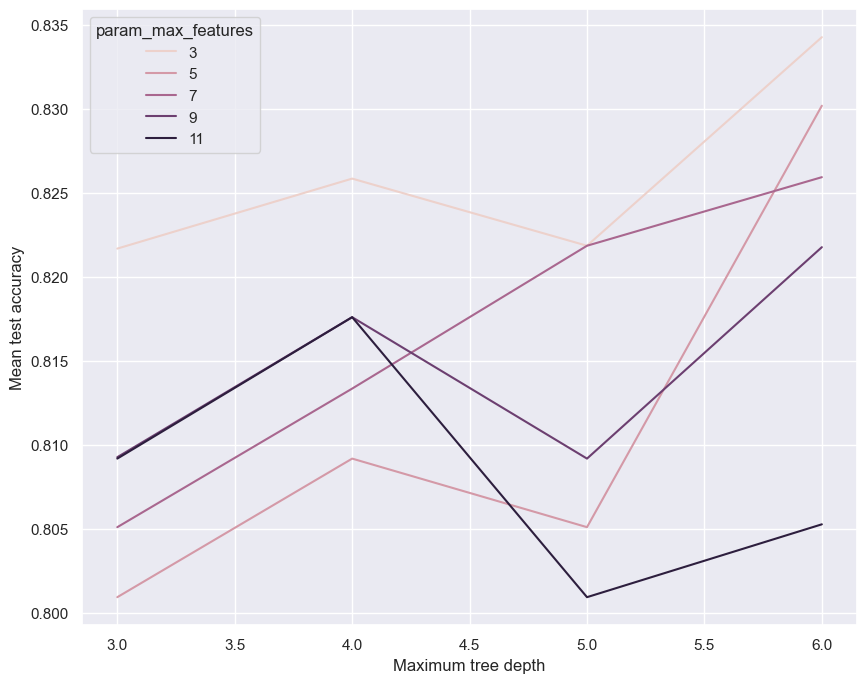

In [348]:
df_100_estimators = df[df['param_n_estimators']==100]

fig, ax = plt.subplots(figsize=(10,8))

_ = sns.lineplot(data=df_100_estimators, x='param_max_depth', y='mean_test_score', hue='param_max_features', ax=ax)
ax.set_xlabel('Maximum tree depth')
ax.set_ylabel('Mean test accuracy')

Text(0, 0.5, 'Mean test accuracy')

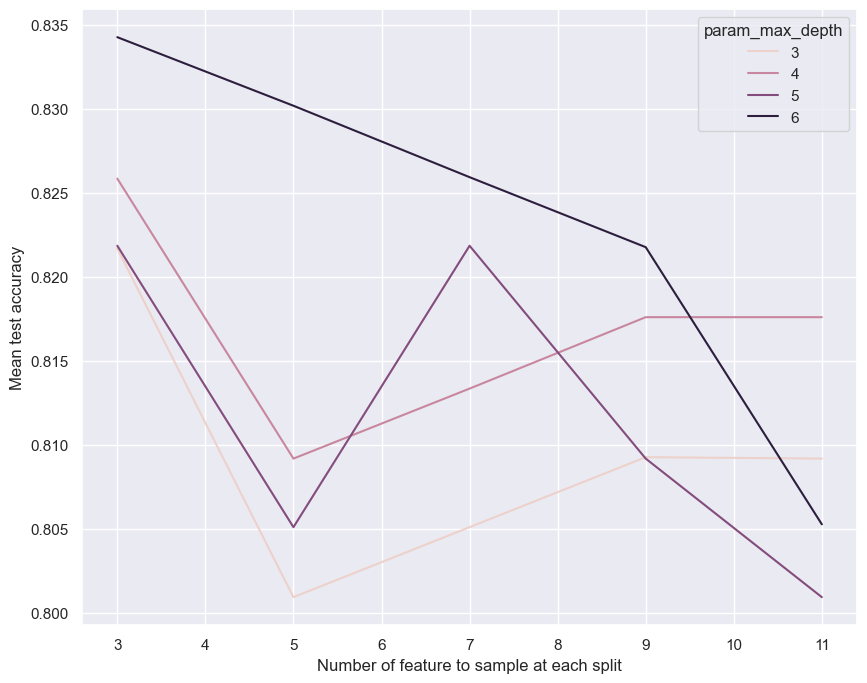

In [349]:
fig, ax = plt.subplots(figsize=(10,8))

_ = sns.lineplot(data=df_100_estimators, x='param_max_features', y='mean_test_score', hue='param_max_depth', ax=ax)
ax.set_xlabel('Number of feature to sample at each split')
ax.set_ylabel('Mean test accuracy')

Text(0, 0.5, 'Mean test accuracy')

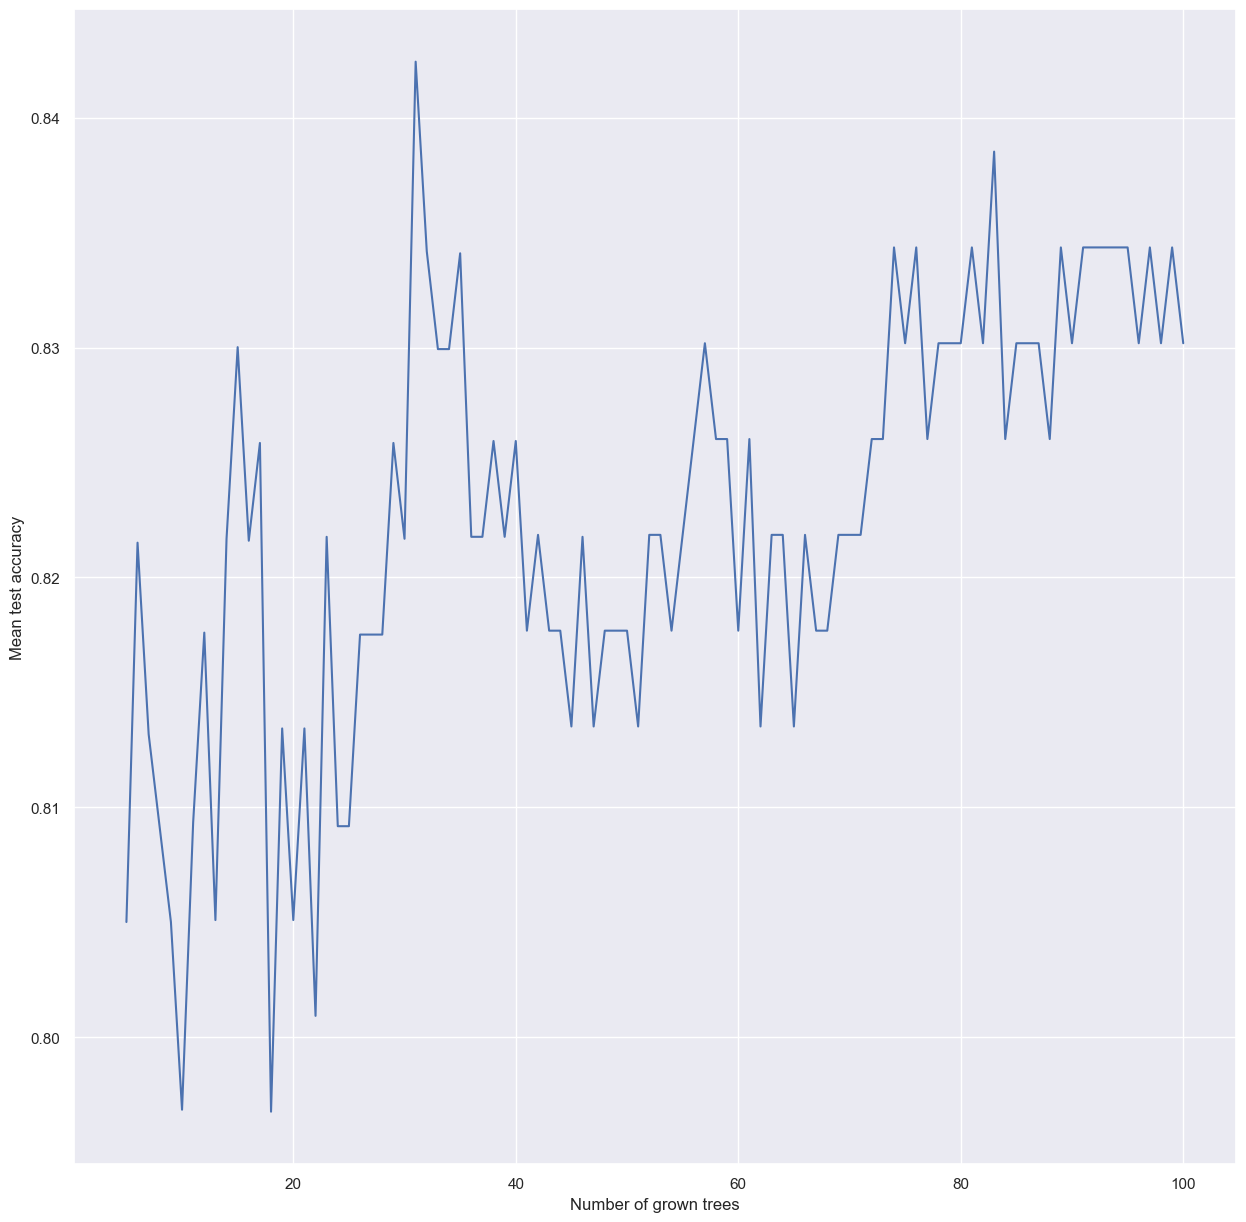

In [350]:
#We use the best to vizuallize the accuracy as a function of the grown trees
#What are they?
df_num_estimators = df[((df['param_max_features']==5) & (df['param_max_depth']==6))]
# for 1-6, 3,4

fig, ax = plt.subplots(figsize=(15,15))

_ = sns.lineplot(data=df_num_estimators, x='param_n_estimators', y='mean_test_score', ax=ax)
ax.set_xlabel('Number of grown trees')
ax.set_ylabel('Mean test accuracy')


In [351]:
from tabulate import tabulate


In [352]:
## Look at the best estimator and the importance of the features
score = rf_grid.best_estimator_.fit(X_train, y_train)
headers = ["name", "score"]
values = sorted(zip(range(0,P), rf_grid.best_estimator_.feature_importances_), key=lambda x: x[1] * -1)

# See which features are deemed most important by the classifier
# Only gonna look at the 10 most important features out of 14
print(tabulate(values[0:10], ["name", "score"][0:10], tablefmt="plain"))
print ('Random Forest OOB error rate: {}'.format(1 - rf_grid.best_estimator_.oob_score_))

  name      score
    12  0.137787
     2  0.122299
     9  0.111709
     7  0.109228
     8  0.101775
    11  0.0898751
     0  0.0723084
     3  0.0655529
    10  0.0647888
     4  0.0628017
Random Forest OOB error rate: 0.2157676348547718


In [353]:
y_predict = rf_grid.best_estimator_.predict(X_test)
cnf_matrix_rf = metrics.confusion_matrix(y_test, y_predict)
rf_fpr, rf_tpr, _ = metrics.roc_curve(y_test, y_predict)
aucr = metrics.roc_auc_score(y_test, y_predict)

In [354]:
print(classification_report(y_test,y_predict))
accuracy_score(y_test, y_predict)


              precision    recall  f1-score   support

           0       0.77      0.89      0.83        27
           1       0.90      0.79      0.84        34

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



0.8360655737704918

### SVM

In [99]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


In [355]:
# First Logistic regression <- below is extremely naiv way to use it, rampant overfit is expected
# warning is due to perfect separation of data
#LogModel = LogisticRegression()
#yhat_log = LogModel.fit(X_train, y_train).predict(X_test)
#LogModelAcc = abs(sum(yhat_log == y_test))/len(y_test) # a bit better then the simple imple. in matlab

kernelType = ["rbf", "poly", "sigmoid"]
                
cVal = np.logspace(-3,4)
                
clf = svm.SVC(degree=3, shrinking = False)
# Try to add more of the parameters from the model and then add them to this dict to see how it affects the model.
param_grid = {
    'kernel': kernelType,
    'C': cVal
}

rf_grid = GridSearchCV(estimator = clf, param_grid = param_grid, cv = 10, verbose=2, n_jobs=5)

# Fit the grid search model
rf_grid.fit(X_train, y_train)

print(rf_grid.best_estimator_)

Fitting 10 folds for each of 150 candidates, totalling 1500 fits
SVC(C=517.9474679231203, kernel='poly', shrinking=False)


0.9180327868852459


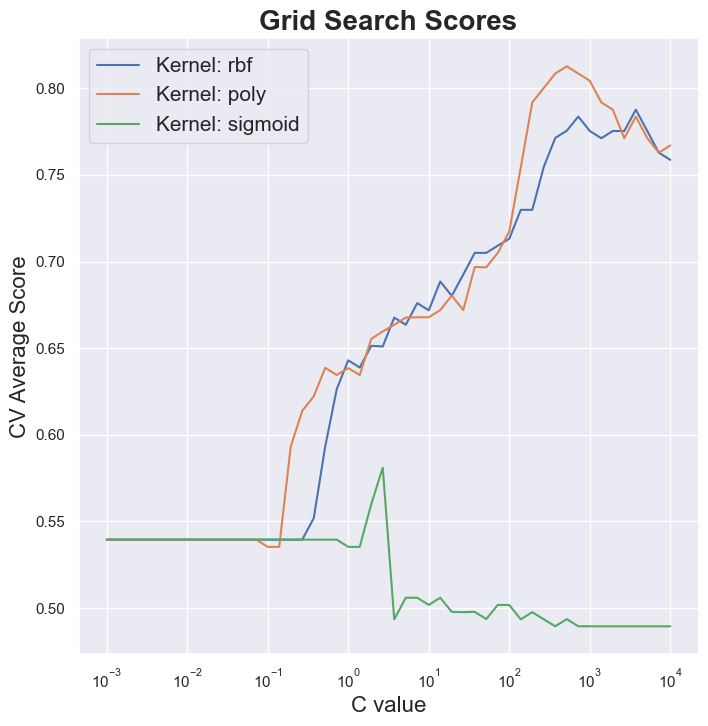

In [356]:
# Get Test Scores Mean and std for each grid search
scores_mean = rf_grid.cv_results_['mean_test_score']
scores_mean = np.array(scores_mean).reshape(len(cVal),len(kernelType))

# Plot Grid search scores
_, ax = plt.subplots(1,1, figsize=(8,8))

# Param1 is the X-axis, Param 2 is represented as a different curve (color line)
for idx, val in enumerate(kernelType):
    ax.plot(cVal, scores_mean[:, idx], '-', label= 'Kernel: ' + str(val))

ax.set_xscale('log')
ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
ax.set_xlabel("C value", fontsize=16)
ax.set_ylabel('CV Average Score', fontsize=16)
ax.legend(loc="best", fontsize=15)
ax.grid('on')

modelOpt = rf_grid.best_estimator_
modelOpt = modelOpt.fit(X_train, y_train)
y_est_test = modelOpt.predict(X_test)
acc_svm = np.abs(sum(y_est_test == y_test))/len(y_test)
print(acc_svm)
#print("Logistic Regression accuracy of %0.2f, and svm accuracy of %0.2f" % (LogModelAcc, acc_svm))

In [357]:
cnf_matrix_svm = metrics.confusion_matrix(y_test, y_est_test)
#sns.heatmap(cnf_matrix_svm,annot=True,cmap="Blues",fmt="d",cbar=False)
svm_fpr, svm_tpr, _ = metrics.roc_curve(y_test, y_est_test)
auc = metrics.roc_auc_score(y_test, y_est_test)

### All confussion metrix

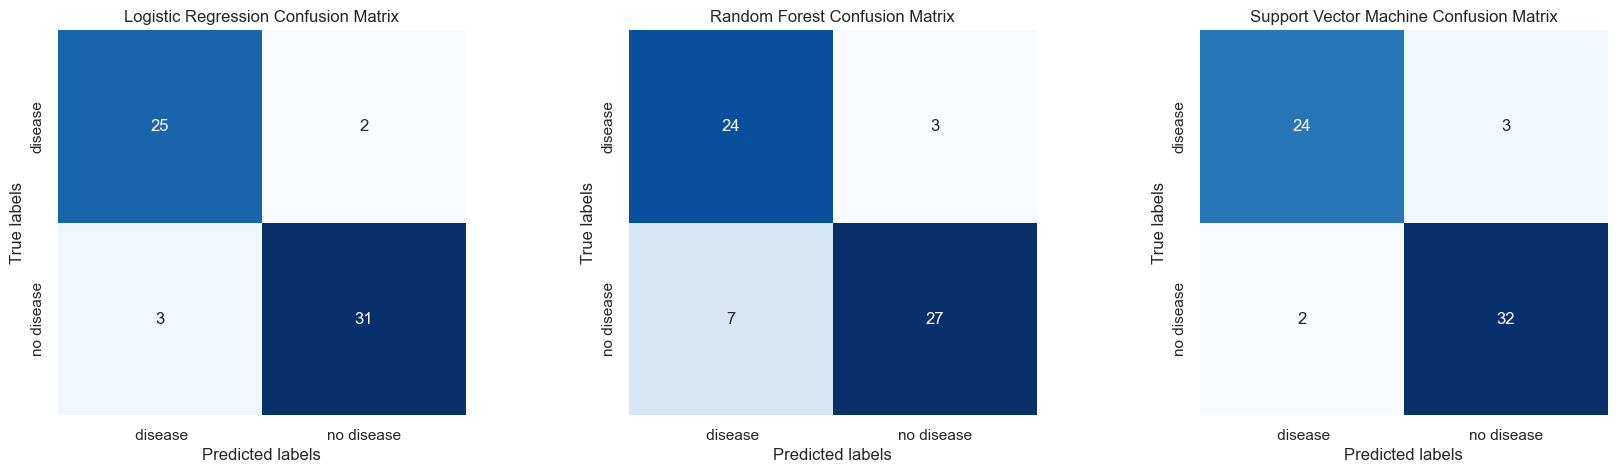

In [358]:
plt.figure(figsize=(20,12))
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)
ax = plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cnf_matrix_lr,annot=True,cmap="Blues",fmt="d",cbar=False)
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels([' disease', 'no disease']);
ax.yaxis.set_ticklabels(['disease', 'no disease']);

ax = plt.subplot(2,3,2)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cnf_matrix_rf,annot=True,cmap="Blues",fmt="d",cbar=False)
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels([' disease', 'no disease']);
ax.yaxis.set_ticklabels(['disease', 'no disease']);

ax= plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cnf_matrix_svm,annot=True,cmap="Blues",fmt="d",cbar=False)
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels([' disease', 'no disease']);
ax.yaxis.set_ticklabels(['disease', 'no disease']);
plt.show()



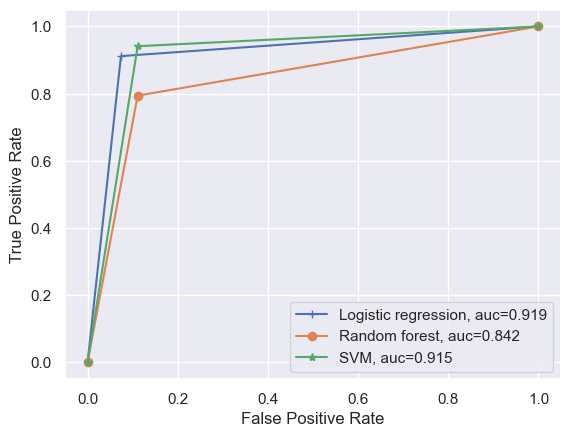

In [359]:
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='+', label='Logistic regression, auc='+str(float('{:.3}'.format(aucl))))
plt.plot(rf_fpr, rf_tpr, marker='o', label='Random forest, auc='+str(float('{:.3}'.format(aucr))))
plt.plot(svm_fpr, svm_tpr, marker='*', label="SVM, auc="+str(float("{:.3f}".format(auc))) )

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()
